In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [8]:
x.shape

(31,)

array([-0.99534608, -0.75150988,  1.33334286,  1.65868258,  1.142434  ,
        0.39401845,  1.62047701,  0.05769267, -0.33047022,  0.16525457,
        0.6323765 , -1.10574823, -0.68397246, -1.16985371,  0.39188226,
        0.30165054,  2.11315847,  0.68188844, -0.5191851 , -0.09132987,
       -1.07975305, -1.45957148,  0.40982905, -0.15311475,  0.72938647,
       -2.73120217, -1.3723642 , -1.56499591, -0.63368764, -0.63294282,
        0.45651292])

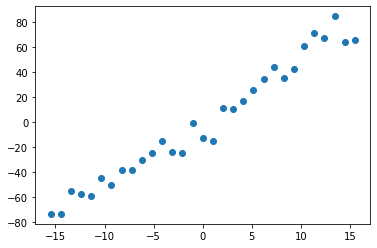

In [13]:
true_a = 5
true_b = 0
true_sd = 10
sample_size = 31

x = np.linspace(-(sample_size/2),sample_size/2,sample_size)
y = true_a*x + true_b + true_sd*np.random.randn(*x.shape)

plt.scatter(x,y)

In [ ]:
def likelihood(param):
    a = param[0]     # intercept
    b = param[1]     # slope
    sd = param[2]
    
    y_predict = a  + b * x
    single_likelihoods = scipy.stats.norm(y_predict, sigma_e).pdf(y)        # we know sigma_e is 3.0
    return np.sum(np.log(single_likelihoods))

In [20]:
from scipy import stats
a = 3
b = 0.5
sd = 1

y_predict = a  + b * x

scipy.stats.norm(y_predict, sd).pdf(y)

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 9.06715717e-301,
       9.24447110e-312, 6.50439532e-201, 2.20094864e-137, 1.51977691e-056,
       1.52939892e-137, 2.51123352e-158, 3.76178304e-003, 6.81403587e-054,
       2.69735036e-075, 7.37504489e-013, 4.34134351e-009, 4.56991892e-031,
       9.05588679e-092, 7.75570446e-175, 3.80086283e-306, 1.15814682e-171,
       1.55801580e-269, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000])

In [3]:

cov = np.array([[1,0.5],[0.5,1]])
mean = np.array([[1],[1]])
norm_dist = lambda x: np.exp(-0.5*np.matmul(np.matmul(np.transpose(x-mean),cov),x-mean))


# Escolha um candidato
x0 = np.array([[1],[1]])
p0 = norm_dist(x0)

In [5]:
# Dimensão
d = 2

# Distribuição desejada
mean = np.array([0,0])             # media em x=0 e y=0
cov = np.array([[1,0.5],[0.5,1]])  # variancias de x e y em 1, cov = 0.5
cov_inv = np.linalg.inv(cov)
norm_dist = lambda x: np.exp(      # gaussiana multivariada
    -0.5*np.matmul(
        np.matmul(np.reshape(x - mean,(1,d)),cov_inv),
        np.reshape(x - mean,(d,1)))
)[0][0]

# Distribuição proposta
prop_dist = lambda x: 1 * np.random.uniform(-1,1,d)

# Escolha um candidato
x0 = np.array([0,0])
p0 = norm_dist(x0)

# Iniciando a Amostra
sample = [x0]

# Iterações
for i in range(10000):
    
    # Novo candidato
    x_cand = x0 + prop_dist(x0)
    p_cand = norm_dist(x_cand)
    
    # Probabilidade de aceitação
    A = min(1, p_cand/p0)
    
    if np.random.random() <= A:
        x0 = x_cand
        p0 = p_cand
        
    sample.append(x0)
    
sample = np.array(sample)

In [27]:
print(" x = {:.2f} +- {:.2f}".format(np.mean(sample[:,0]),np.std(sample[:,0]))) 
print(" y = {:.2f} +- {:.2f}".format(np.mean(sample[:,1]),np.std(sample[:,1]))) 
print("cov(x,y) = {:.2f}".format(np.cov(x,y)[0][1]))

 x = -0.01 +- 1.01
 y = 0.01 +- 1.00
cov(x,y) = 0.48


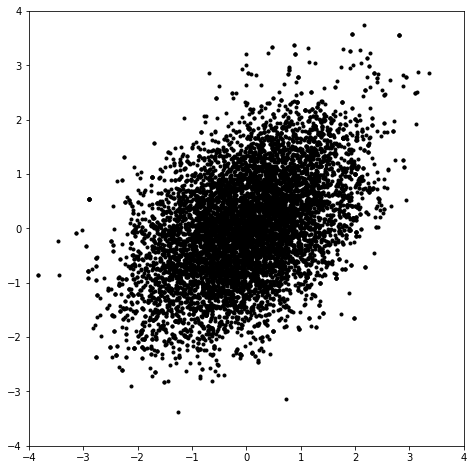

In [10]:
x = sample[:,0]
y = sample[:,1]

fig, ax = plt.subplots(figsize=(8, 8))
ax.clear()
ax.axis([-4,4,-4,4])
ax.set_aspect(1)

i=10000

_ = ax.scatter(x[:i], y[:i], marker='.', color = 'black')

plt.show()

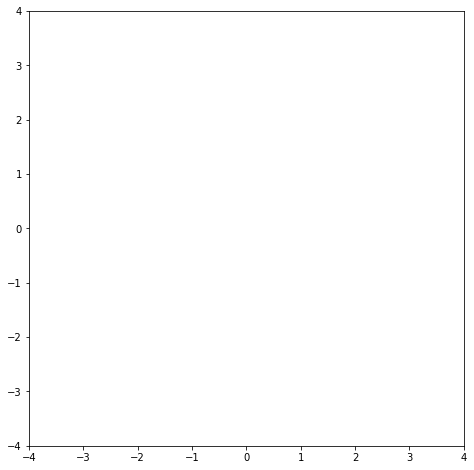

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))

n = 10

def animate(i):
    ini = 0 if i <= n else i - n
    ax.clear()
    ax.axis([-4,4,-4,4])
    ax.set_aspect(1)
    l, = ax.plot(x[ini:i], y[ini:i], color = 'red')
    _ = ax.scatter(x[:i], y[:i], marker='.', color = 'black')

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=1000)

ani.save('mcmc.gif', writer='imagemagick', fps=100)

# HTML(ani.to_jshtml())